In [1]:
import os
import numpy as np
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing import image
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Data directories
train_dir = '/content/drive/MyDrive/A/Train'
test_dir = '/content/drive/MyDrive/A/Test'

Mounted at /content/drive


In [3]:
from tensorflow.keras.applications import ResNet50

# Load ResNet50 model
resnet_model = ResNet50(weights='imagenet', include_top=False)


94765736/94765736 [==============================] - 1s 0us/step


In [4]:
# Function to extract features from an image using EfficientNetB7
def extract_features_efficientnet(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model.predict(img_data)
    return features
    import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, ResNet50

def extract_features_resnet(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Assuming ResNet50 input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    resnet_model = ResNet50(weights='imagenet', include_top=False)
    features = resnet_model.predict(img_array)
    features_flattened = features.flatten()

    return features_flattened


In [5]:
import os

x_train, y_train = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_resnet(os.path.join(class_dir, img_path))
        x_train.append(features)
        y_train.append(i)


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


In [6]:
# Load images and extract features
x_test, y_test = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_resnet(os.path.join(class_dir, img_path))
        x_test.append(features)
        y_test.append(i)

1/1 [==============================] - 1s 1s/step


In [ ]:
import torch

# Load the model using torch.load
model_classification = torch.load('/content/drive/MyDrive/NewModel.h5')

# Function to classify features using NewModel.h5
def classify_features(features):
    # Convert features to torch tensor
    features_tensor = torch.tensor(features)

    # Set the model to evaluation mode
    model_classification.eval()

    # Forward pass
    with torch.no_grad():
        predictions = model_classification(features_tensor)

    # Get the predicted classes
    _, predicted_classes = torch.max(predictions, 1)

    return predicted_classes.numpy()

Training Random Forest (max_depth=15, n_estimators=150, max_features='sqrt', bootstrap=True, random_state=42) for resnet50...
Performance metrics for Random Forest (max_depth=15, n_estimators=150, max_features='sqrt', bootstrap=True, random_state=42) with resnet50:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        60
           2       1.00      1.00      1.00        60
           3       1.00      1.00      1.00        60
           4       1.00      1.00      1.00        60

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Accuracy: 1.0
Sensitivity: 1.0
Precision: 1.0
F1 Score: 1.0
Specificity: 1.0
Recall: 1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


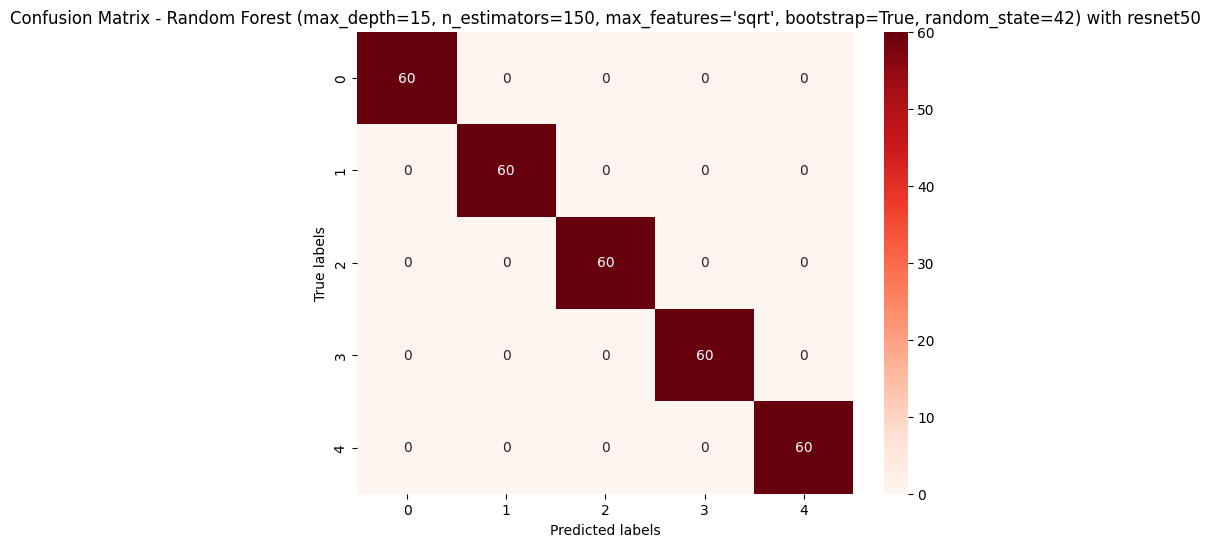

Training Random Forest (max_depth=15, n_estimators=150, max_features='auto', bootstrap=True, random_state=42) for resnet50...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Performance metrics for Random Forest (max_depth=15, n_estimators=150, max_features='auto', bootstrap=True, random_state=42) with resnet50:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        60
           2       1.00      1.00      1.00        60
           3       1.00      1.00      1.00        60
           4       1.00      1.00      1.00        60

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Accuracy: 1.0
Sensitivity: 1.0
Precision: 1.0
F1 Score: 1.0
Specificity: 1.0
Recall: 1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


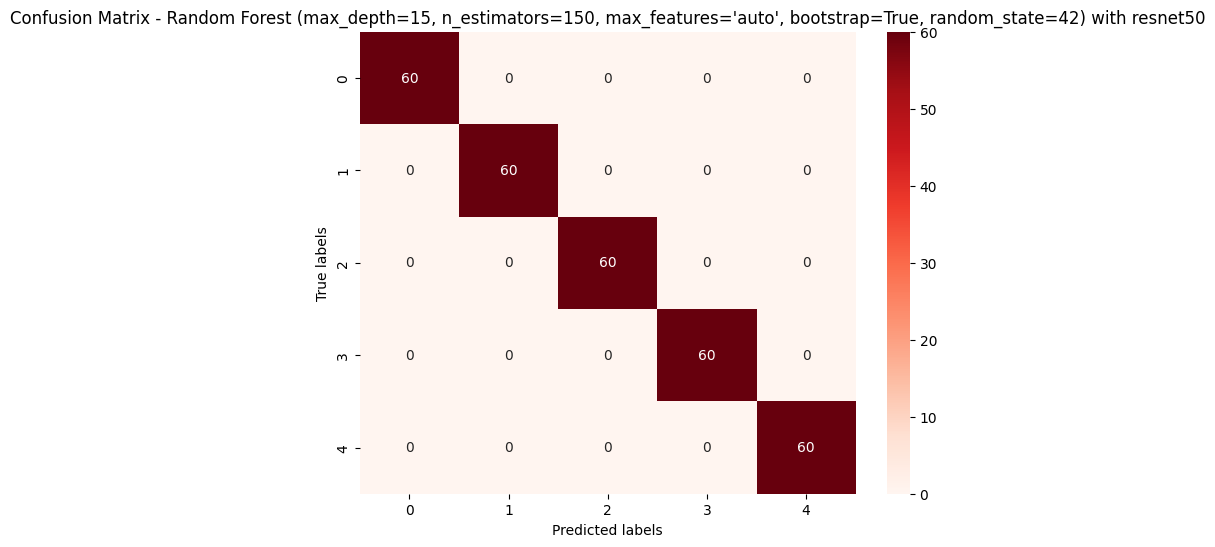

Training Random Forest (max_depth=15, n_estimators=150, max_features='log2', bootstrap=True, random_state=42) for resnet50...
Performance metrics for Random Forest (max_depth=15, n_estimators=150, max_features='log2', bootstrap=True, random_state=42) with resnet50:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        60
           2       1.00      1.00      1.00        60
           3       1.00      1.00      1.00        60
           4       1.00      1.00      1.00        60

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Accuracy: 1.0
Sensitivity: 1.0
Precision: 1.0
F1 Score: 1.0
Specificity: 1.0
Recall: 1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


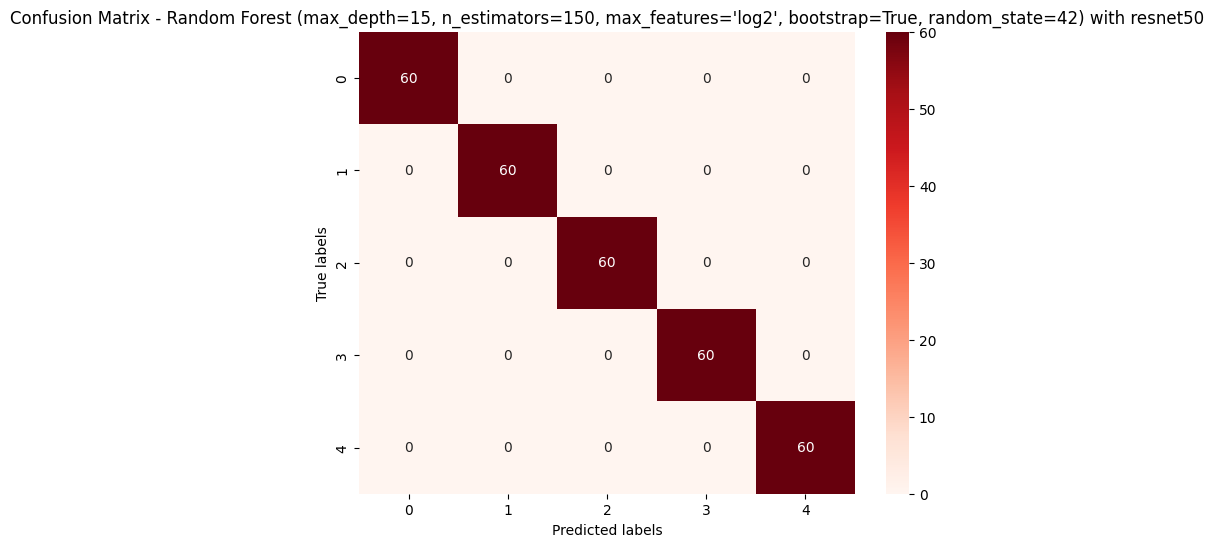

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score  # Add this import statement

# Flatten the features for B2
x_train_flat_b2 = np.array([feature.flatten() for feature in x_train])
x_test_flat_b2 = np.array([feature.flatten() for feature in x_test])

# Scale the input features to the range [0, 1] for B2
scaler_b2 = MinMaxScaler()
x_train_scaled_b2 = scaler_b2.fit_transform(x_train_flat_b2)
x_test_scaled_b2 = scaler_b2.transform(x_test_flat_b2)

# Ensure non-negative values for B2
min_value_b2 = np.min(np.concatenate([x_train_scaled_b2, x_test_scaled_b2]))
x_train_scaled_non_negative_b2 = x_train_scaled_b2 - min_value_b2
x_test_scaled_non_negative_b2 = x_test_scaled_b2 - min_value_b2

# List of classifiers
classifiers = {
    "Random Forest (max_depth=15, n_estimators=150, max_features='sqrt', bootstrap=True, random_state=42)": RandomForestClassifier(max_depth=15, n_estimators=150, max_features='sqrt', bootstrap=True, random_state=42),
    "Random Forest (max_depth=15, n_estimators=150, max_features='auto', bootstrap=True, random_state=42)": RandomForestClassifier(max_depth=15, n_estimators=150, max_features='auto', bootstrap=True, random_state=42),
    "Random Forest (max_depth=15, n_estimators=150, max_features='log2', bootstrap=True, random_state=42)": RandomForestClassifier(max_depth=15, n_estimators=150, max_features='log2', bootstrap=True, random_state=42),
}

for clf_name, clf in classifiers.items():
    print(f"Training {clf_name} for resnet50...")
    # Train classifier
    clf.fit(x_train_scaled_non_negative_b2, y_train)
    # Predict on test set
    y_pred_b2 = clf.predict(x_test_scaled_non_negative_b2)
    # Print performance metrics
    print(f'Performance metrics for {clf_name} with resnet50:')
    print('Classification Report:')
    print(classification_report(y_test, y_pred_b2))  # Use classification_report directly

    # Additional performance metrics
    accuracy = accuracy_score(y_test, y_pred_b2)
    sensitivity = recall_score(y_test, y_pred_b2, average='macro')
    precision = precision_score(y_test, y_pred_b2, average='macro')
    f1 = f1_score(y_test, y_pred_b2, average='macro')
    specificity = recall_score(y_test, y_pred_b2, average='macro', pos_label=0)  # Specificity
    recall = recall_score(y_test, y_pred_b2, average='macro')  # Recall

    print(f'Accuracy: {accuracy}')
    print(f'Sensitivity: {sensitivity}')
    print(f'Precision: {precision}')
    print(f'F1 Score: {f1}')
    print(f'Specificity: {specificity}')
    print(f'Recall: {recall}\n')

    # Confusion matrix
    cm_b2 = confusion_matrix(y_test, y_pred_b2)

    # Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_b2, annot=True, cmap='Reds', fmt='g', xticklabels=[str(i) for i in range(5)], yticklabels=[str(i) for i in range(5)])
    plt.title(f'Confusion Matrix - {clf_name} with resnet50')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()
